In [14]:
!pip install torch-geometric torch-scatter torch-sparse torch-cluster torch-spline-conv
!pip install networkx

  Using cached torch_geometric-2.6.1-py3-none-any.whl.metadata (63 kB)
  Using cached torch_scatter-2.1.2.tar.gz (108 kB)
  Preparing metadata (setup.py) ... done
  Using cached torch_sparse-0.6.18.tar.gz (209 kB)
  Preparing metadata (setup.py) ... done
  Using cached torch_cluster-1.6.3.tar.gz (54 kB)
  Preparing metadata (setup.py) ... done
  Using cached torch_spline_conv-1.2.2.tar.gz (25 kB)
  Preparing metadata (setup.py) ... done
Using cached torch_geometric-2.6.1-py3-none-any.whl (1.1 MB)
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp311-cp311-linux_x86_64.whl size=547368 sha256=dbf1e466ad1de4f469d3ac84584a8b963ebe779f36c1c8da508aa159453eb4f5
  Stored in directory: /root/.cache/pip/wheels/b8/d4/0e/a80af2465354ea7355a2c153b11af2da739cfcf08b6c0b28e2
  Created wheel for torch-sparse: filename=torch_sparse-0.6.18-cp311-cp311-linux_x86_64.whl size=1127937 sha256=f1dfb12fee0e71df47a61eea297364d9e2da7713718543fbf850a6d4e67908f2
  Stored in directory: /root/.cache/p

In [15]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='data/', name='Cora')
data = dataset[0]

Processing...
Done!


In [18]:
import networkx as nx
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)

if not nx.is_connected(G):
    # pega o maior componente conectado
    comps = list(nx.connected_components(G))
    maior = max(comps, key=len)
    Gc = G.subgraph(maior).copy()
    print("Tamanho do subgrafo:", Gc.number_of_nodes(), "nós")
else:
    Gc = G

print("Conectado?", nx.is_connected(Gc))

Tamanho do subgrafo: 2485 nós
Conectado? True


In [19]:
import numpy as np
A = nx.to_numpy_array(Gc, dtype=np.int8)
print("Matriz adjacência:", A.shape)

Matriz adjacência: (2485, 2485)


In [21]:
diam = nx.diameter(Gc)
perif = nx.periphery(Gc)

print("Diâmetro da rede:", diam)
print("Nós na periferia:", perif)

Diâmetro da rede: 19
Nós na periferia: [2462, 2513]


In [22]:
densidade = nx.density(Gc)
print(f"Densidade da rede: {densidade:.6f}")

Densidade da rede: 0.001642


In [23]:
r = nx.degree_assortativity_coefficient(Gc)
print(f"Coeficiente de assortatividade (grau): {r:.6f}")

Coeficiente de assortatividade (grau): -0.071365


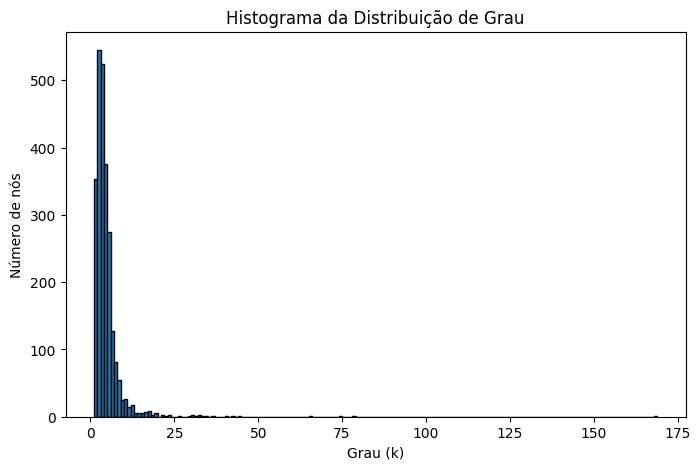

In [24]:
import matplotlib.pyplot as plt

grau = [G.degree(n) for n in Gc.nodes()]
plt.figure(figsize=(8, 5))
plt.hist(grau, bins=range(min(grau), max(grau) + 2), edgecolor='black')
plt.title('Histograma da Distribuição de Grau')
plt.xlabel('Grau (k)')
plt.ylabel('Número de nós')
plt.show()

In [25]:
# Local clustering para nós específicos (ex: [0, 1, 2, 3, 4])
nos = [0, 1, 2, 3, 4]
clust_local = nx.clustering(Gc, nodes=nos)
print("Clustering local:", clust_local)

# Clustering médio (coeficiente local global médio)
media_local = nx.average_clustering(Gc)
print(f"Média dos clustering locais: {media_local:.4f}")

# Coeficiente de agrupamento global (transitividade)
clust_global = nx.transitivity(Gc)
print(f"Clustering global (transitividade): {clust_global:.4f}")


Clustering local: {0: 0.3333333333333333, 1: 0, 2: 0, 4: 0.7}
Média dos clustering locais: 0.2376
Clustering global (transitividade): 0.0900


In [27]:
from torch_geometric.utils import to_networkx
Gd = to_networkx(data, to_undirected=False)

# Checar conectividade
print("Strongly connected?", nx.is_strongly_connected(Gd))
print("Weakly connected?", nx.is_weakly_connected(Gd))

# Números de componentes
n_strong = nx.number_strongly_connected_components(Gd)
n_weak = nx.number_weakly_connected_components(Gd)
print(f"Número de SCC: {n_strong}")
print(f"Número de WCC: {n_weak}")

Strongly connected? False
Weakly connected? False
Número de SCC: 78
Número de WCC: 78


In [28]:
scc = sorted(nx.strongly_connected_components(Gd), key=len, reverse=True)
wcc = sorted(nx.weakly_connected_components(Gd), key=len, reverse=True)
print("Maior SCC:", len(scc[0]), "nós")
print("Maior WCC:", len(wcc[0]), "nós")

Maior SCC: 2485 nós
Maior WCC: 2485 nós


In [29]:
deg_cent = nx.degree_centrality(Gc)
eig_cent = nx.eigenvector_centrality(Gc, max_iter=200, tol=1e-06)
close_cent = nx.closeness_centrality(Gc)
btwn_cent = nx.betweenness_centrality(Gc)

In [30]:
k = 10
top_deg = sorted(deg_cent, key=deg_cent.get, reverse=True)[:k]
top_eig = sorted(eig_cent, key=eig_cent.get, reverse=True)[:k]
top_close = sorted(close_cent, key=close_cent.get, reverse=True)[:k]
top_btwn = sorted(btwn_cent, key=btwn_cent.get, reverse=True)[:k]
print("Top Degree:", top_deg)
print("Top Eigenvector:", top_eig)
print("Top Closeness:", top_close)
print("Top Betweenness:", top_btwn)

Top Degree: [1358, 306, 1701, 1986, 1810, 1623, 2034, 88, 1013, 598]
Top Eigenvector: [1358, 1169, 1765, 1725, 1072, 1103, 1483, 154, 748, 687]
Top Closeness: [1358, 306, 1986, 1072, 2045, 109, 1013, 519, 2034, 1149]
Top Betweenness: [1358, 1986, 2034, 1701, 306, 1072, 1013, 1810, 88, 109]


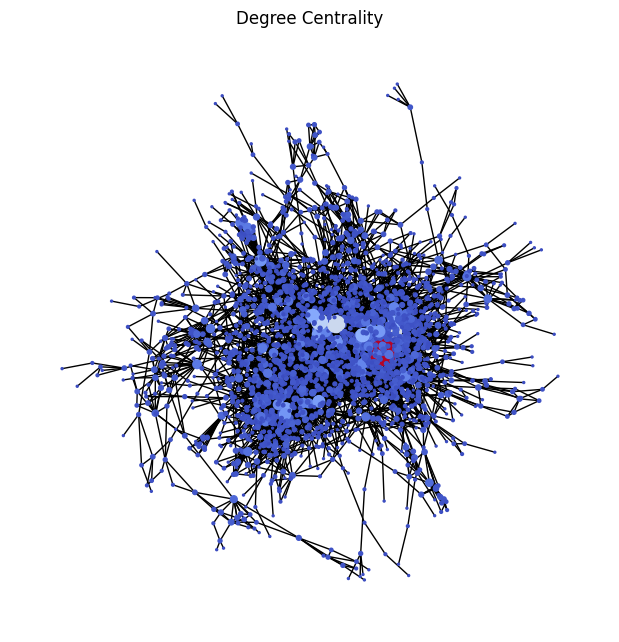

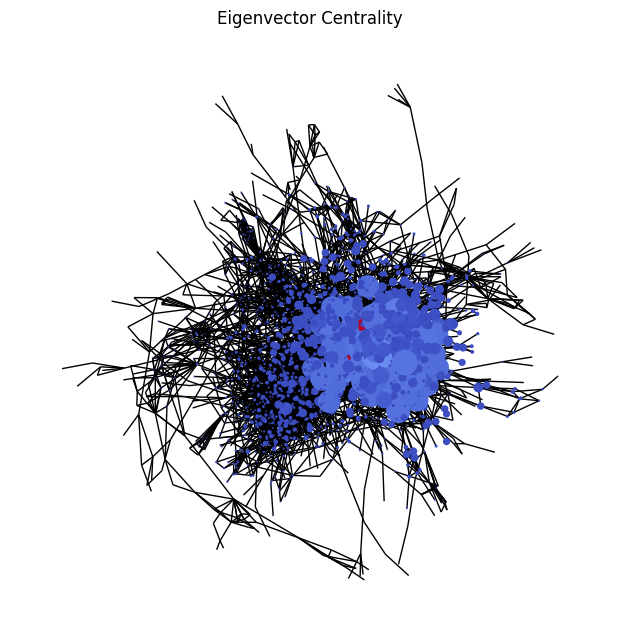

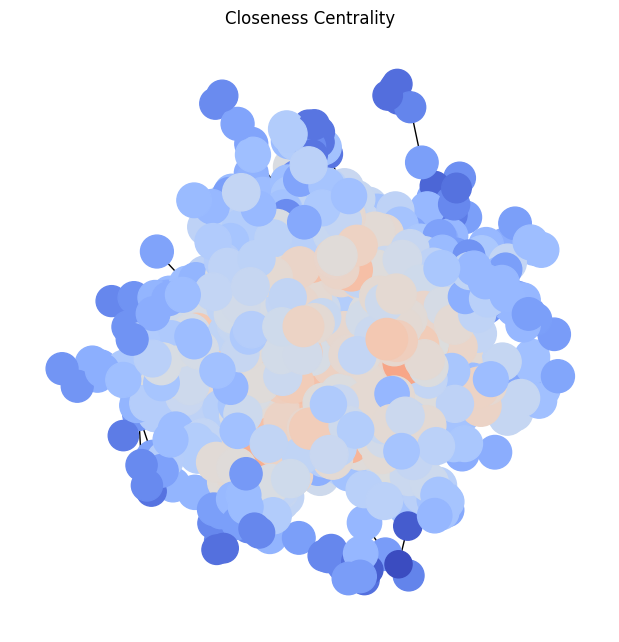

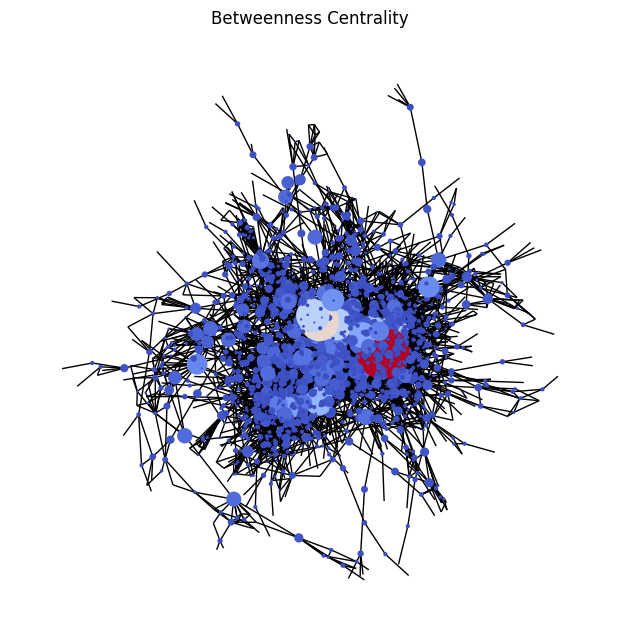

In [31]:
pos = nx.spring_layout(Gc, seed=42)

def plot_centrality(cent, title):
    plt.figure(figsize=(6,6))
    sizes = [5000 * cent[v] for v in Gc.nodes()]
    nx.draw(Gc, pos, node_size=sizes, node_color=list(cent.values()), cmap='coolwarm', with_labels=False)
    plt.title(title)
    plt.show()

plot_centrality(deg_cent, "Degree Centrality")
plot_centrality(eig_cent, "Eigenvector Centrality")
plot_centrality(close_cent, "Closeness Centrality")
plot_centrality(btwn_cent, "Betweenness Centrality")

In [32]:
!pip install python-louvain

In [33]:
import community as community_louvain

partition = community_louvain.best_partition(Gc, resolution=1.0, random_state=42)

/tmp/ipython-input-34-1638680999.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)


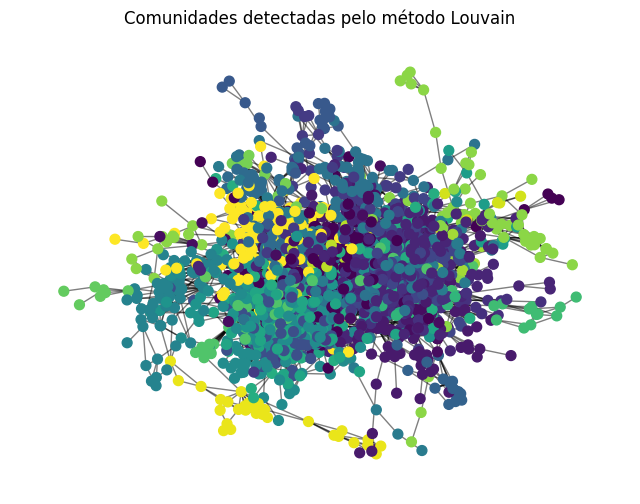

In [34]:
import matplotlib.cm as cm

pos = nx.spring_layout(Gc, seed=42)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)

plt.figure(figsize=(8,6))
nx.draw_networkx_nodes(
    Gc, pos, node_size=50,
    cmap=cmap, node_color=list(partition.values())
)
nx.draw_networkx_edges(Gc, pos, alpha=0.5)
plt.title("Comunidades detectadas pelo método Louvain")
plt.axis('off')
plt.show()


In [35]:
mod = community_louvain.modularity(partition, Gc)
print(f"Modularidade obtida: {mod:.4f}")

Modularidade obtida: 0.8053


In [36]:
dendro = community_louvain.generate_dendrogram(Gc, resolution=1.0)
print("Níveis disponíveis:", len(dendro))

part_level = community_louvain.partition_at_level(dendro, len(dendro)-1)

Níveis disponíveis: 4


In [37]:
n, p = 1000, 0.01
G_er = nx.erdos_renyi_graph(n, p)
G_ws = nx.watts_strogatz_graph(n, k=10, p=0.1)
G_ba = nx.barabasi_albert_graph(n, m=5)

In [38]:
import random
def simulate_attack(G, frac, strategy='random'):
    Gc = G.copy()
    nodes = list(Gc.nodes())
    if strategy=='random':
        to_remove = random.sample(nodes, int(frac*len(nodes)))
    else:
        deg = sorted(Gc.degree(), key=lambda x:x[1], reverse=True)
        to_remove = [n for n,_ in deg[:int(frac*len(nodes))]]
    Gc.remove_nodes_from(to_remove)
    return max(nx.connected_components(Gc), key=len)

In [ ]:
from pyvis.network import Network

net = Network(height="750px", width="100%", notebook=True, cdn_resources='in_line')
net.from_nx(Gc)

deg = nx.degree_centrality(Gc)
comunidades = partition

for n in net.nodes:
    node = int(n["id"])
    n["value"] = deg[node]
    n["group"] = comunidades[node]
    n["title"] = f"Nó {node}<br>Grau={deg[node]:.4f}<br>Com.={comunidades[node]}"

net.show("visualizacao_grafo.html")

In [43]:
import random
Gc_lp = Gc.copy()
edges = list(Gc_lp.edges())
random.shuffle(edges)
removed = edges[:int(0.1 * len(edges))]
Gc_lp.remove_edges_from(removed)

scores_j = list(nx.jaccard_coefficient(Gc_lp))
top_j = sorted(scores_j, key=lambda x: x[2], reverse=True)[:20]

scores_aa = list(nx.adamic_adar_index(Gc_lp))
top_aa = sorted(scores_aa, key=lambda x: x[2], reverse=True)[:20]

truth = set(tuple(sorted(e)) for e in removed)
pred_j = [(u,v) for u,v,_ in top_j]
tp_j = sum(1 for uv in pred_j if tuple(sorted(uv)) in truth)
print("Precision@20 (Jaccard):", tp_j / 20)

pred_aa = [(u,v) for u,v,_ in top_aa]
tp_aa = sum(1 for uv in pred_aa if tuple(sorted(uv)) in truth)
print("Precision@20 (Adamic-Adar):", tp_aa / 20)

Precision@20 (Jaccard): 0.0
Precision@20 (Adamic-Adar): 0.15


In [44]:
!pip install pyvis

In [46]:
net = Network(height='750px', width='100%', notebook=False, cdn_resources='in_line')
net.from_nx(Gc)
net.toggle_physics(True)
net.show('cora.html', notebook=False)

cora.html


In [47]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00


In [ ]:
import streamlit as st

net = Network(height="600px", width="100%", notebook=False, cdn_resources='in_line')
net.from_nx(Gc)
net.toggle_physics(True)

net.save_graph('coraStreamlit.html')
with open('cora.html', 'r', encoding='utf-8') as f:
    html = f.read()
st.components.v1.html(html, height=650, scrolling=True)